### Project title: Behavioral Analaysis of Banking Customers.

### Key target value(s):

- Social Class: This is a socio-economic indicator that places bank clients as enterpreneurs or the working class within a capitalist spectrum.
-  Iventment types: These are varying types of investments that clients participate in:
     * RealEstate, 
     * EmergingMarketFund, 
     * PrivateEquity, 
     * GovtBonds, 
     * CorpBonds, 
     * ETF Health, 
     * ETF Med, 
      * ETF Tech, 
     * LifeInsurance.
-  Investment returns

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
data= pd.read_csv('Bank_Customers.csv')
data.head()

,RowNumber,CustomerID,Surname,CreditScore,Country,Gender,Married,Age,Dependents,NumBankAccts,...,LifeInsurance,NumTransactions,LastTransactionDate,LastTransactionAmt,ForeignAssets,NumProducts,Churn,Discount,Retention,CLV
0,1.0,15634602.0,Hargrave,619.0,France,Female,1.0,42.0,3.0,1.0,...,1.0,5.0,1/27/2019,2095.3,0.39,4.0,0.0,0.21,NaN,NaN
1,2.0,15647311.0,Hill,608.0,Spain,Female,1.0,41.0,2.0,1.0,...,1.0,8.0,2/25/2019,9955.2,0.21,1.0,0.0,0.50,NaN,NaN
2,3.0,15619304.0,Onio,502.0,France,Female,1.0,42.0,2.0,3.0,...,0.0,3.0,11/5/2017,9123.1,0.00,5.0,1.0,0.37,NaN,NaN
3,4.0,15701354.0,Boni,699.0,France,Female,1.0,39.0,0.0,2.0,...,0.0,5.0,1/7/2019,5973.3,0.40,5.0,0.0,0.72,NaN,NaN
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,1.0,43.0,0.0,1.0,...,1.0,2.0,3/28/2015,9834.4,0.13,4.0,0.0,0.26,NaN,NaN


In [3]:
#check the shape of the data
print(f"This dataset contains:\nThe number of rows: {data.shape[0]}\nThe number of columns: {data.shape[1]}")

This dataset contains:
The number of rows: 10001
The number of columns: 39


### Data Preprocessing

In [4]:
#check values in specific columns
col_name= ['Retention', 'CLV', 'Country']
for i,var in enumerate(col_name):
    print(f"{var}: {data[var].unique()}\n")

Retention: [nan]

CLV: [nan]

Country: ['France' 'Spain' 'Germany' nan]



In [5]:
#drop columns not needed.
data = data.drop(['CreditScore', 'CustomerID', 'RowNumber', 'Surname', 'Country', 'Retention', 'CLV', 'Churn'], axis=1)
data.tail()

,Gender,Married,Age,Dependents,NumBankAccts,HasCrCard,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,...,BusinessOwner,Revenue,Margin,LifeInsurance,NumTransactions,LastTransactionDate,LastTransactionAmt,ForeignAssets,NumProducts,Discount
9996,Male,1.0,35.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,32853.18,0.04,1.0,1.0,4/7/2017,654.7,0.17,6.0,0.35
9997,Female,0.0,36.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,45018.39,0.07,1.0,8.0,8/11/2018,8673.2,0.43,6.0,0.59
9998,Male,1.0,42.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,...,0.0,63544.17,0.08,0.0,2.0,3/14/2018,9197.5,0.01,5.0,0.32
9999,Female,0.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,50428.57,0.12,0.0,7.0,8/20/2016,1978.4,0.00,6.0,0.29
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#check the shape again
print(f"The number of Rows and Columns respectively: {data.shape}")

The number of Rows and Columns respectively: (10001, 31)


In [7]:
# Check the data info and decide if you change the types or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               10000 non-null  object 
 1   Married              10000 non-null  float64
 2   Age                  10000 non-null  float64
 3   Dependents           10000 non-null  float64
 4   NumBankAccts         10000 non-null  float64
 5   HasCrCard            10000 non-null  float64
 6   EmergingMarketFund   10000 non-null  float64
 7   RealEstate           10000 non-null  float64
 8   PrivateEquity        10000 non-null  float64
 9   GovtBonds            10000 non-null  float64
 10  CorpBonds            10000 non-null  float64
 11  ETF Tech             10000 non-null  float64
 12  ETF Health           10000 non-null  float64
 13  ETF Med              10001 non-null  int64  
 14  EstimatedSalary      10000 non-null  float64
 15  Mortgage             10000 non-null 

In [8]:
#change marriage dtype to object [yes/no]
data['Married'] = data['Married'].replace({0.0:'No', 1.0:'Yes'})

In [9]:
data.nunique()

Gender                    2
Married                   2
Age                      70
Dependents                6
NumBankAccts              4
HasCrCard                 2
EmergingMarketFund        2
RealEstate                2
PrivateEquity             2
GovtBonds                 2
CorpBonds                 2
ETF Tech                  2
ETF Health                2
ETF Med                   2
EstimatedSalary        9758
Mortgage                  2
Risk Profile             51
Debt                   7353
Net Assets             9406
Portfolio Return       1001
Diversification        3528
BusinessOwner             2
Revenue                9992
Margin                   11
LifeInsurance             2
NumTransactions          10
LastTransactionDate    1638
LastTransactionAmt     9478
ForeignAssets            51
NumProducts               6
Discount                 74
dtype: int64

In [10]:
for col in data.columns:
    print(f"{col:}, {data[col].unique()}\n")

Gender, ['Female' 'Male' nan]

Married, ['Yes' 'No' nan]

Age, [42. 41. 39. 43. 44. 50. 29. 27. 31. 24. 34. 25. 35. 45. 58. 32. 38. 46.
 36. 33. 40. 51. 61. 49. 37. 19. 66. 56. 26. 21. 55. 75. 22. 30. 28. 65.
 48. 52. 57. 73. 47. 54. 72. 20. 67. 79. 62. 53. 80. 59. 68. 23. 60. 70.
 63. 64. 18. 82. 69. 74. 71. 76. 77. 88. 85. 84. 78. 81. 92. 83. nan]

Dependents, [ 3.  2.  0.  1.  5.  4. nan]

NumBankAccts, [ 1.  3.  2.  4. nan]

HasCrCard, [ 1.  0. nan]

EmergingMarketFund, [ 1.  0. nan]

RealEstate, [ 0.  1. nan]

PrivateEquity, [ 1.  0. nan]

GovtBonds, [ 0.  1. nan]

CorpBonds, [ 1.  0. nan]

ETF Tech, [ 1.  0. nan]

ETF Health, [ 1.  0. nan]

ETF Med, [0 1]

EstimatedSalary, [101349. 112543. 113932. ...  92889.  38191.     nan]

Mortgage, [ 1.  0. nan]

Risk Profile, [0.16 0.48 0.13 0.21 0.03 0.04 0.26 0.45 0.38 0.4  0.34 0.05 0.49 0.28
 0.42 0.32 0.37 0.33 0.23 0.25 0.15 0.08 0.19 0.12 0.06 0.24 0.01 0.35
 0.09 0.   0.14 0.02 0.2  0.18 0.36 0.11 0.5  0.31 0.3  0.39 0.44 0.27
 0.22

###  Statistical Analysis

In [11]:
#Statistical analysis of the data
data.describe()

,Age,Dependents,NumBankAccts,HasCrCard,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,...,Diversification,BusinessOwner,Revenue,Margin,LifeInsurance,NumTransactions,LastTransactionAmt,ForeignAssets,NumProducts,Discount
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,2.012600,1.530200,0.70550,0.497500,0.501000,0.499600,0.504200,0.506000,0.507300,...,0.291656,0.491900,43858.356706,0.079935,0.515100,5.469100,5201.839060,0.154225,3.525300,0.396433
std,10.487806,1.736705,0.581654,0.45584,0.500019,0.500024,0.500025,0.500007,0.499989,0.499972,...,0.109940,0.499959,27049.722956,0.029161,0.499797,2.863331,2766.934647,0.167332,1.706415,0.213682
min,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,3398.480000,0.030000,0.000000,1.000000,375.200000,0.000000,1.000000,0.030000
25%,32.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.196500,0.000000,22339.682500,0.050000,0.000000,3.000000,2800.100000,0.000000,2.000000,0.210000
50%,37.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.291900,0.000000,37942.225000,0.080000,1.000000,5.000000,5187.000000,0.090000,4.000000,0.400000
75%,44.000000,4.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.388725,1.000000,60641.352500,0.110000,1.000000,8.000000,7600.875000,0.300000,5.000000,0.580000
max,92.000000,5.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.479900,1.000000,128977.310000,0.130000,1.000000,10.000000,9999.000000,0.500000,6.000000,0.760000


### Data Cleaning

In [12]:
#check null values in the data
null = data.isnull().sum()
null_perc = null / data.shape[0] *100
dframe= pd.DataFrame({"Null values" : null, "Null values percentage" : round((null_perc),2)})
print(dframe)

                     Null values  Null values percentage
Gender                         1                    0.01
Married                        1                    0.01
Age                            1                    0.01
Dependents                     1                    0.01
NumBankAccts                   1                    0.01
HasCrCard                      1                    0.01
EmergingMarketFund             1                    0.01
RealEstate                     1                    0.01
PrivateEquity                  1                    0.01
GovtBonds                      1                    0.01
CorpBonds                      1                    0.01
ETF Tech                       1                    0.01
ETF Health                     1                    0.01
ETF Med                        0                    0.00
EstimatedSalary                1                    0.01
Mortgage                       1                    0.01
Risk Profile                   

In [13]:
#since the null values are less than 1%, I will drop them
data.dropna(axis=0, inplace=True)

In [14]:
#check for duplicated values
data.duplicated().sum()

0

In [15]:
#groups according to age

def age_groups(x):
    if x >=18 and x <= 35:
        return "Youth"
    elif x >= 36 and x <=60:
        return "Adult"
    elif x >= 61:
        return "Senior"
    else:
        return None
data['Age'] = data['Age'].apply(age_groups)

In [16]:
#group the column 'BusinessOwner' into social classes
def social_class(x):
    if x == 1. :
        return "Entrepreneur"
    elif x== 0. :
        return "WorkingClass"
    else:
        return None
data['BusinessOwner'] = data['BusinessOwner'].apply(social_class)

In [17]:
#Rename the column to Social Class
data.rename(columns= {'BusinessOwner': 'SocialClass'}, inplace=True) 

### Exploratory Data Analysis

#### What is the biographical data of customers?

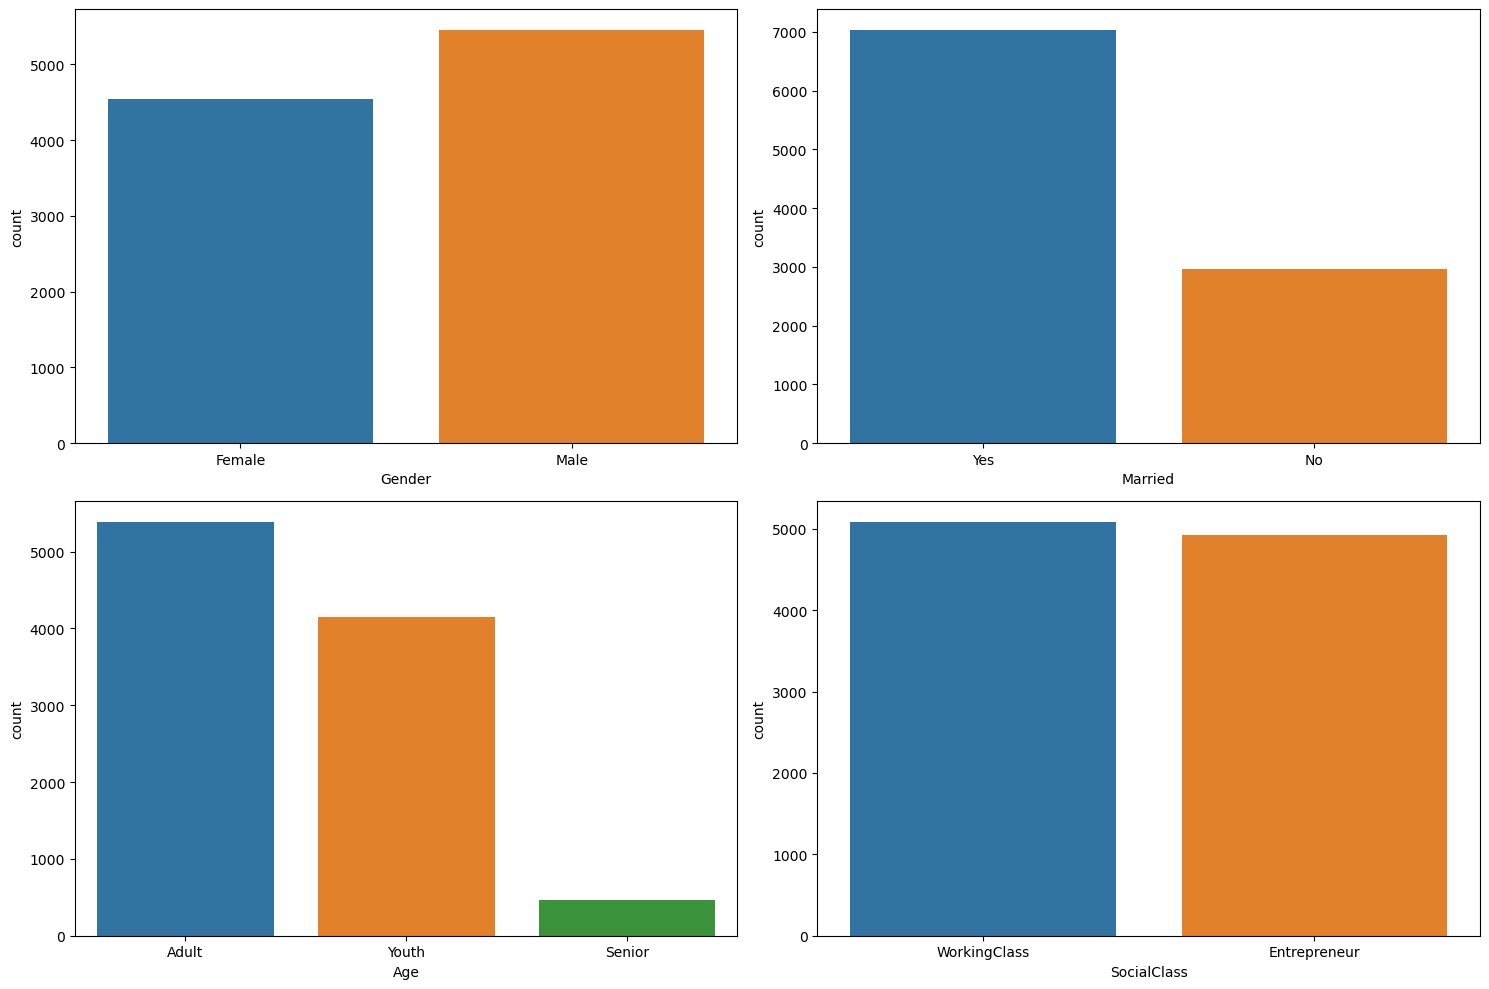

In [18]:
#show the distribution of categorical variables
cat_var = data.select_dtypes(include='object').columns

fig,axs = plt.subplots(2,2, figsize=(15,10))
axes= axs.flatten()
for i,var in enumerate(cat_var):
    if (var!="LastTransactionDate"):
        sns.countplot(x=var, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

#### What is the difference in salary estimates between classes?

In [19]:
data.groupby('SocialClass')['EstimatedSalary'].sum()

SocialClass
Entrepreneur    490264646.0
WorkingClass    510657769.0
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='SocialClass', ylabel='EstimatedSalary'>

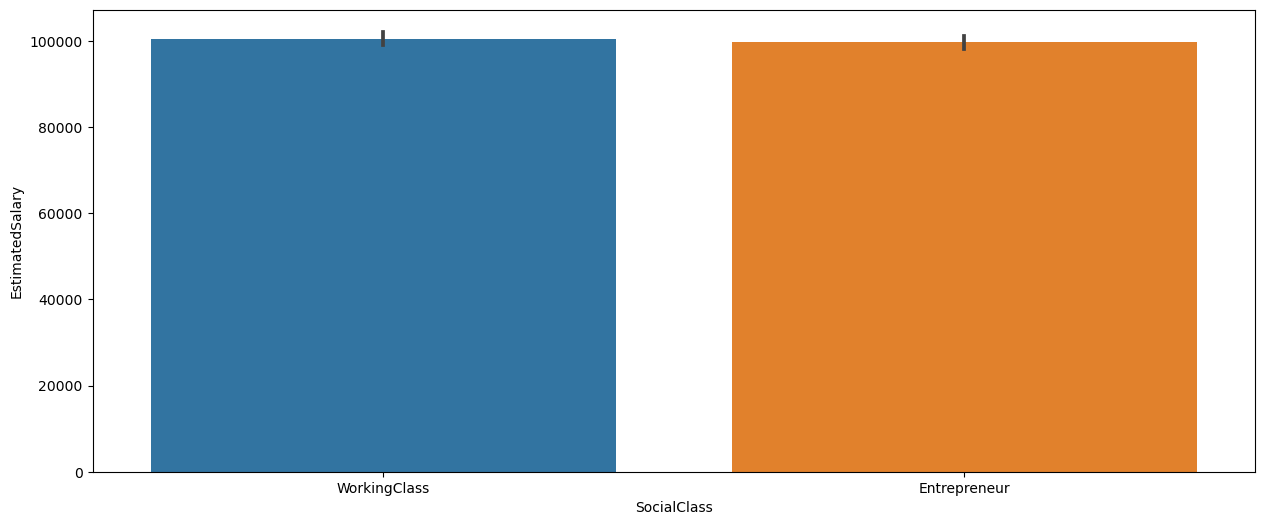

In [20]:
plt.figure(figsize = (15,6))
sns.barplot(x = "SocialClass", y= "EstimatedSalary", data=data)

#### What is the difference in revenue?

In [21]:
data.groupby('SocialClass')['Revenue'].sum()

SocialClass
Entrepreneur    2.170394e+08
WorkingClass    2.215442e+08
Name: Revenue, dtype: float64

<Axes: xlabel='SocialClass', ylabel='Revenue'>

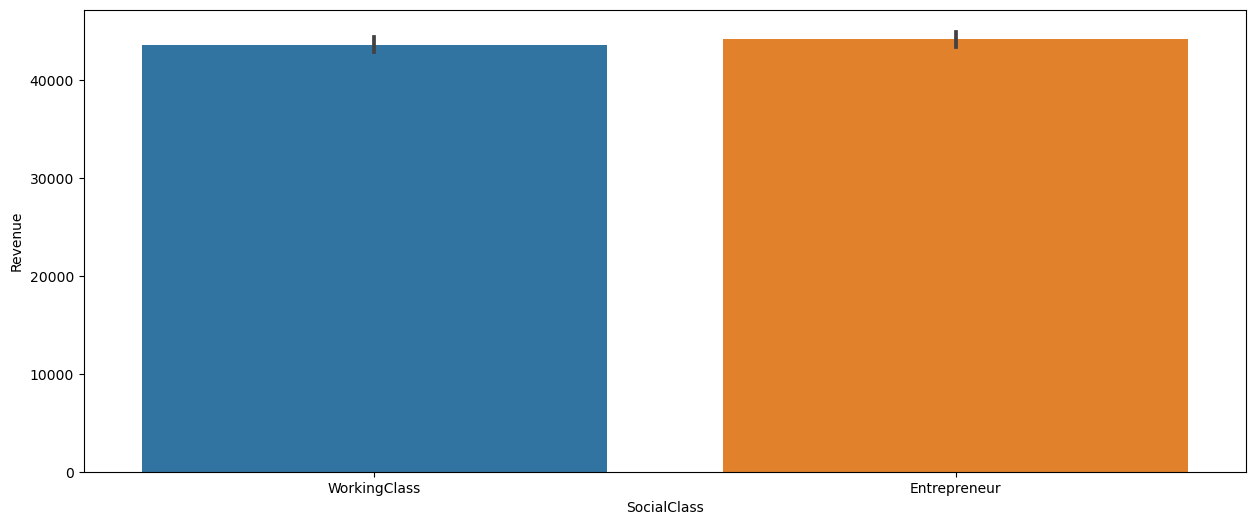

In [22]:
plt.figure(figsize = (15,6))
sns.barplot(x = "SocialClass", y= "Revenue", data=data)

#### What is the transaction behaviour between two social classes?

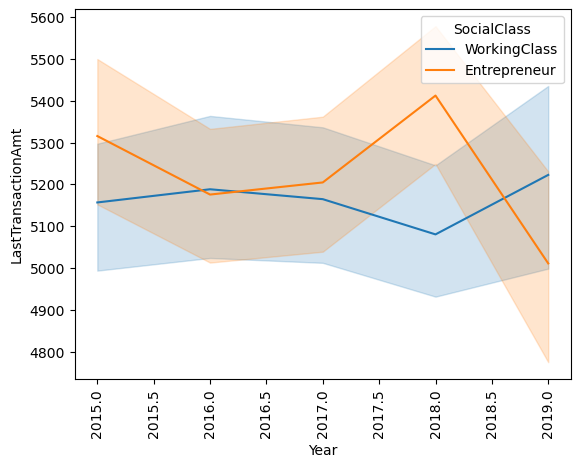

In [23]:
#check transaction data
#change transaction to datetime format
data['LastTransactionDate'] = pd.to_datetime(data['LastTransactionDate'])

#extract day, month and year
data['Day'] = data['LastTransactionDate'].dt.day
data['Month'] = data['LastTransactionDate'].dt.month
data['Year'] = data['LastTransactionDate'].dt.year

#Last transaction amount
sns.lineplot(x='Year', y='LastTransactionAmt', data=data, hue='SocialClass')
#sns.lineplot(x='Month', y= 'LastTransactionAmt', data=data, hue='SocialClass')
plt.xticks(rotation=90)
plt.show()

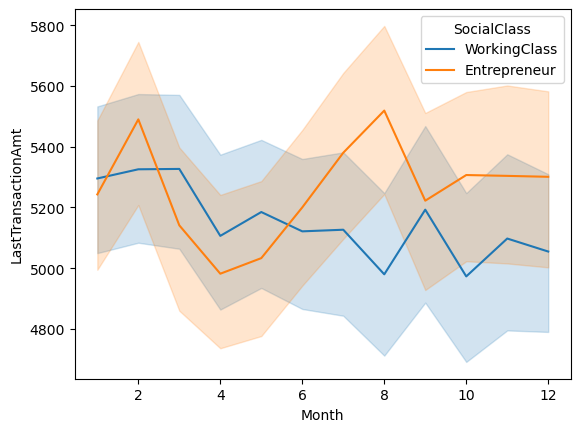

In [24]:
sns.lineplot(x='Month', y= 'LastTransactionAmt', data=data, hue='SocialClass')
plt.show()

#### What is the distribution of investment types among the two social classes?

#### The types of investments among clientele

In [25]:
investment_type = ['RealEstate', 'EmergingMarketFund', 'PrivateEquity', 'GovtBonds', 'CorpBonds', 
              'ETF Health', 'ETF Med', 'ETF Tech', 'LifeInsurance']

#### Four main categories of investment types (Asset classes):

In [26]:
Equity = ['PrivateEquity', 'EmergingMarketFund', 'PrivateEquity']
Bonds = ['GovtBonds', 'corpBonds']
Cash_Equivalent = ['ETF Helath', 'ETF Med', 'ETF TEch', 'LifeInsurance']
Real_Estate =['RealEstate']

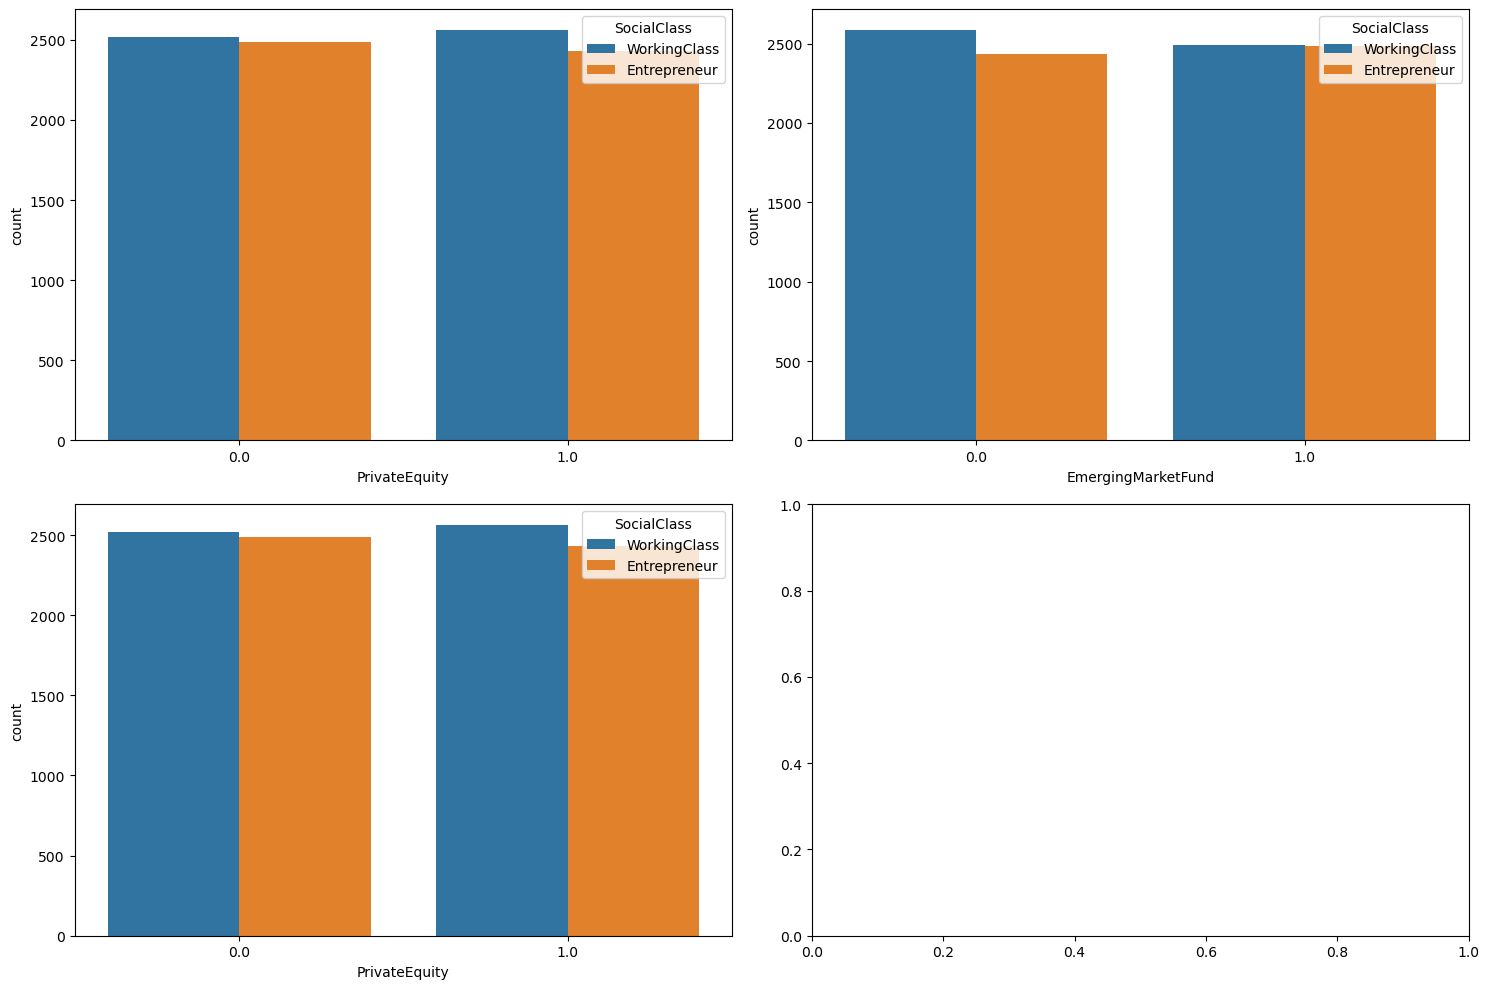

In [27]:
Equity = ['PrivateEquity', 'EmergingMarketFund', 'PrivateEquity']

fig,axs = plt.subplots(2,2, figsize=(15,10))
axes = axs.flatten()
for i,var in enumerate(Equity):
        sns.countplot(x=var, data=data, hue='SocialClass', ax=axes[i])
#Remove the 4th plot
#fig.delaxes(axs[])

fig.tight_layout()
plt.show()

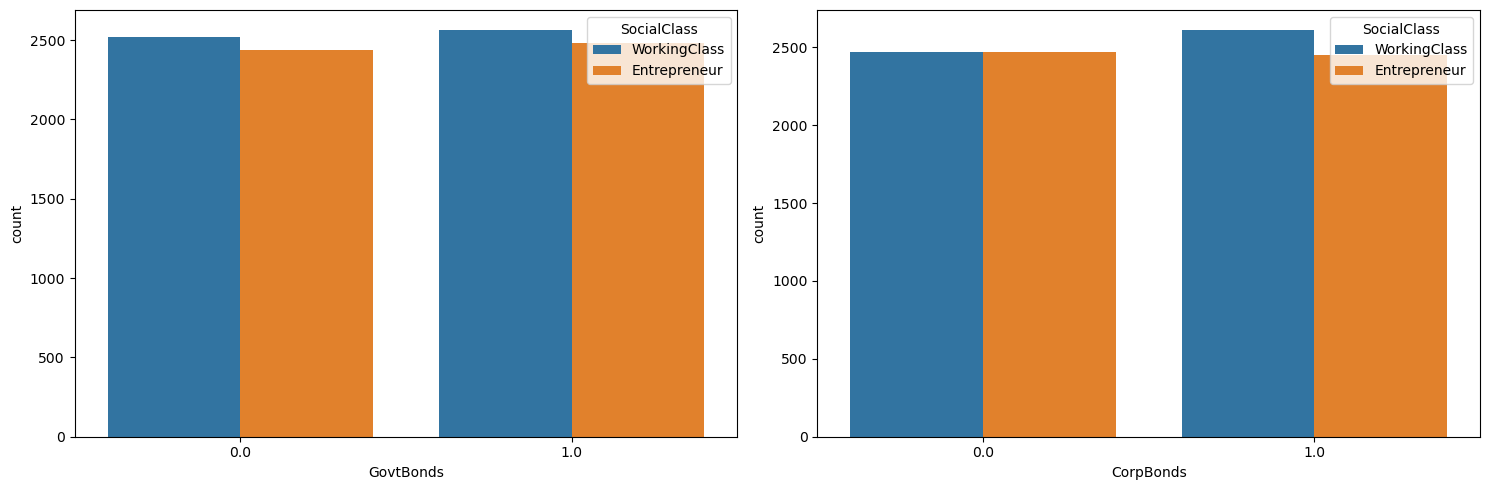

In [28]:
Bonds = ['GovtBonds', 'CorpBonds']
fig,axs = plt.subplots(1,2, figsize=(15,5))
axes = axs.flatten()
for i,var in enumerate(Bonds):
        sns.countplot(x=var, data=data, hue='SocialClass', ax=axes[i])

fig.tight_layout()
plt.show()

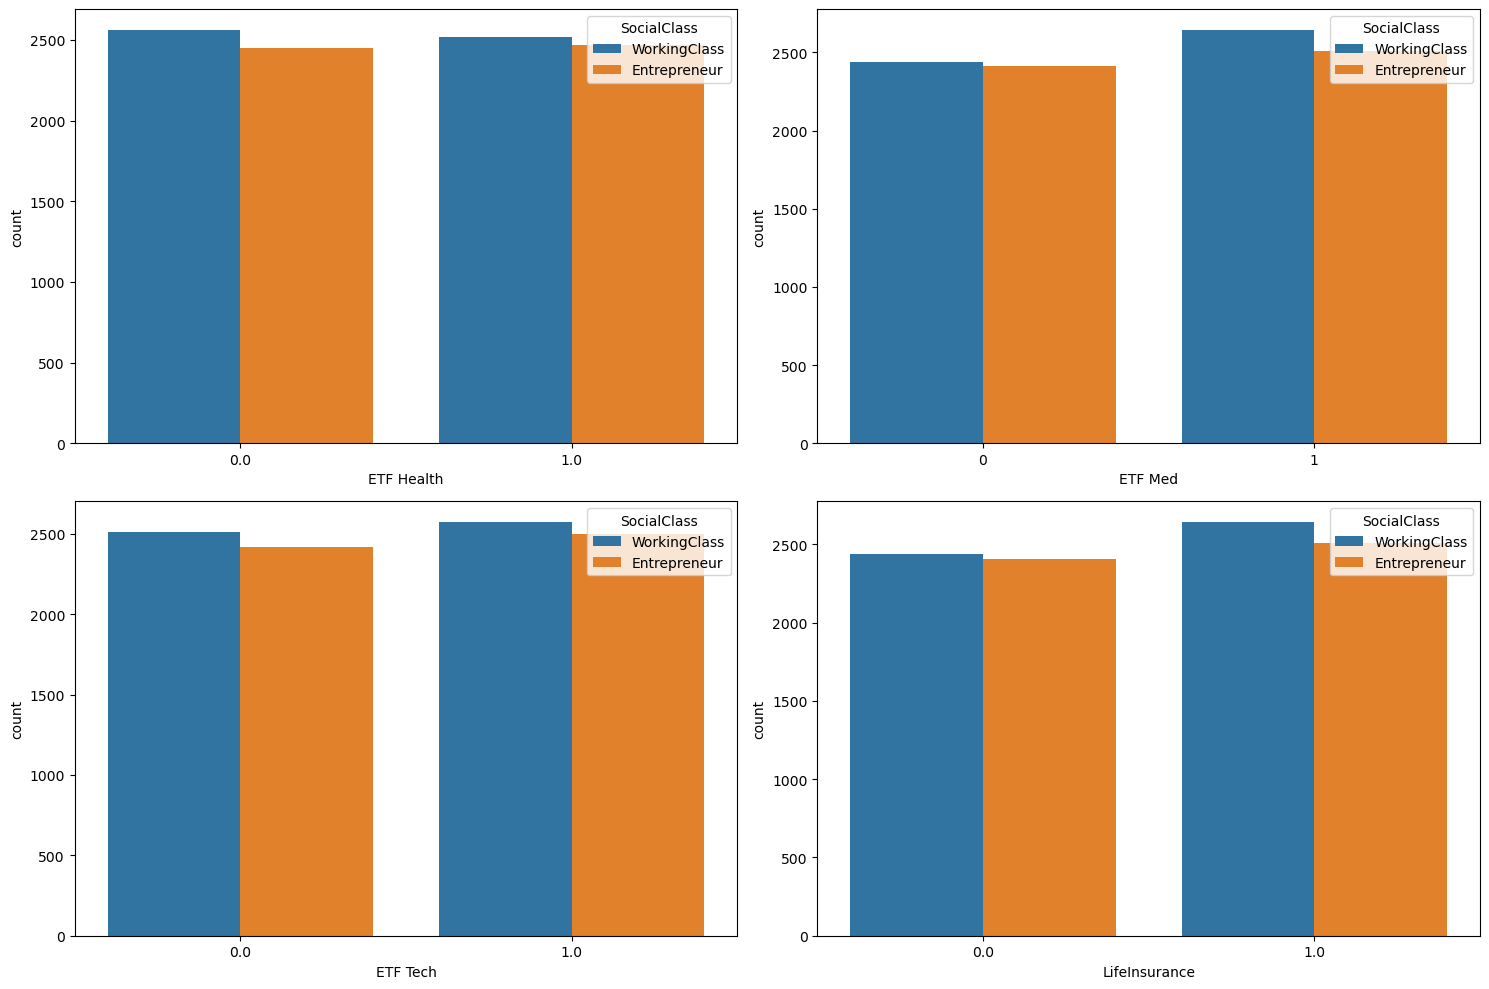

In [30]:
Cash_Equivalent = ['ETF Health', 'ETF Med', 'ETF Tech', 'LifeInsurance']
fig,axs = plt.subplots(2,2, figsize=(15,10))
axes = axs.flatten()
for i,var in enumerate(Cash_Equivalent):
        sns.countplot(x=var, data=data, hue='SocialClass', ax=axes[i])

fig.tight_layout()
plt.show()

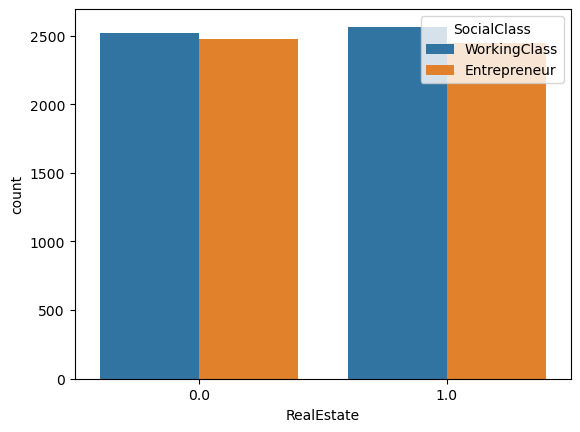

In [31]:
Real_Estate =['RealEstate']
sns.countplot(x='RealEstate', data=data, hue="SocialClass")
plt.show()

### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Initialise the LableEncoder
encoder = LabelEncoder()

# Loop through the each column in the dataset where the dtype is 'object'
for col in data.select_dtypes(include= "object").columns:
    
    #initialise a labelencoder object:
    label_encoder = preprocessing.LabelEncoder()
    
    #fit the encoder to the unique values in the column:
    label_encoder.fit(data[col].unique())
    
    # Transform the column usinf the encoder:
    data[col] = label_encoder.transform(data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Gender: [0 1]
Married: [1 0]
Age: [0 2 1]
SocialClass: [1 0]


In [33]:
# converting datetime feature to time stamps

data['Date_num'] = (data['LastTransactionDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data = data.drop(["LastTransactionDate"], axis=1)


#### Predictive Modelling: Customer segmentation using the K-means clustering algorithm.

In [34]:
#create anf fit the kmeans model with 4 clusters
kmeans = KMeans(n_clusters=6, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(data)

In [35]:
y_predict

array([0, 0, 4, ..., 5, 5, 1])

In [36]:
#get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [37]:
#evaluation metric for clustering: silhouette score
silhoutte_score = metrics.silhouette_score(data, labels)

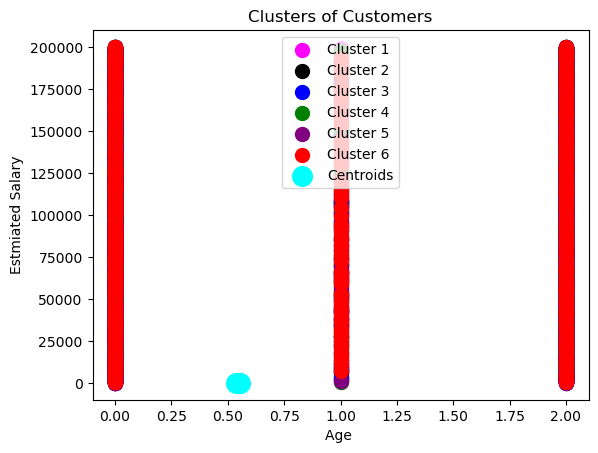

In [40]:
#visualise the clusters
plt.scatter(data["Age"][y_predict==0], data["EstimatedSalary"][y_predict==0], s=100,
           c='magenta', label = 'Cluster 1')

plt.scatter(data["Age"][y_predict==1], data["EstimatedSalary"][y_predict==1], s=100,
           c='black', label = 'Cluster 2')

plt.scatter(data["Age"][y_predict==2], data["EstimatedSalary"][y_predict==2], s=100,
           c='blue', label = 'Cluster 3')

plt.scatter(data["Age"][y_predict==3], data["EstimatedSalary"][y_predict==3], s=100,
           c='green', label = 'Cluster 4')

plt.scatter(data["Age"][y_predict==4], data["EstimatedSalary"][y_predict==4], s=100,
           c='purple', label = 'Cluster 5')

plt.scatter(data["Age"][y_predict==5], data["EstimatedSalary"][y_predict==5], s=100,
           c='red', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200,
           c = 'cyan', label = 'Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Age ")
plt.ylabel("Estmiated Salary")
plt.legend()
plt.show()


The KMeans clustering outcome indicates that a large number of the banking customers fall under cluster 6 across all ages. 